<a href="https://colab.research.google.com/github/zcwisc/GB657/blob/main/Module_4_ImageClassificationViaCNNLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: Image Data and Image Classification via CNN

In this lab, we will consider an image classification problem on the Fashion MNIST dataset. Here, we predict what fashion item is shown on a given image.


The dataset contains 28 by 28 pixel images. The images are of fashion items and the labels correspond to different fashion items -- here is the label	description:
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

The problem, obviously, is to predict what kind of fashion item is on the image.

## Load packages and Data

Let's load some packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

And let's take a look at the data:

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


...and at a few of the items:

2


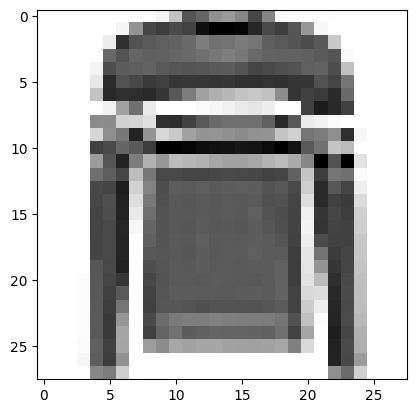

In [3]:
image_index = 5
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

...so this is a pullover.

9


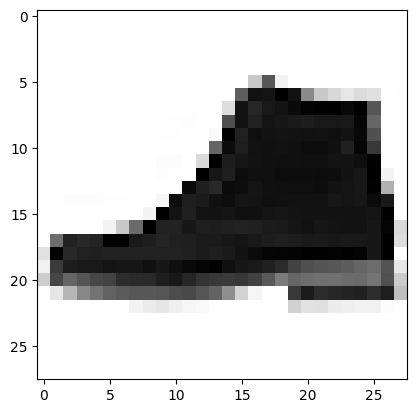

In [4]:
image_index = 42
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

So this is an ankle boot.

## Data Formatting

As before, let's set a random seed and let's format the data for modeling:

In [5]:
np.random.seed(42)

num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## Feed-forward Neural Net

Let's start by using a very similar neural net as we did in the previous application. We start by reshaping the inputs to simple vectors:

In [6]:
x_train_trad = x_train.reshape(x_train.shape[0], 784)
x_test_trad = x_test.reshape(x_test.shape[0], 784)

x_train_trad = x_train_trad / 255
x_test_trad = x_test_trad/ 255

And let's build a feed-forward model, as we did before. Again we use the soft-max function as the output layer for this multi-class problem, and we use 'categorical_crossentropy' as the (multi-class) loss function:

In [7]:
model = Sequential()
model.add(Dense(50, input_shape=(784, ), activation='relu', name='dense_1'))
model.add(Dense(25, activation='relu', name='dense_2'))
model.add(Dense(10, activation='softmax', name='dense_output'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 10)             │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,785 (159.32 KB)

 Trainable params: 40,785 (159.32 KB)

 Non-trainable params: 0 (0.00 B)

Let's train it using 20 epochs:

In [8]:
history = model.fit(x_train_trad, y_train, epochs=20, validation_data=(x_test_trad, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7512 - loss: 0.7147 - val_accuracy: 0.8426 - val_loss: 0.4440
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8552 - loss: 0.4085 - val_accuracy: 0.8543 - val_loss: 0.3995
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8680 - loss: 0.3621 - val_accuracy: 0.8591 - val_loss: 0.3863
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8763 - loss: 0.3382 - val_accuracy: 0.8444 - val_loss: 0.4183
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8822 - loss: 0.3182 - val_accuracy: 0.8702 - val_loss: 0.3618
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8894 - loss: 0.3055 - val_accuracy: 0.8667 - val_loss: 0.3652
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8934 - loss: 0.2912 - val_accuracy: 0.8769 - val_loss: 0.3529
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8958 - loss: 0.2812 - 

So, again, we notice that after around 15 eopochs the validation fit doesn't seem to improve much. And, the acuracy is lower than 90%. So, it appears that the neural net is not working super well here. Let's try...

## Convolutional Neural Nets



To run the convolutional neural net, we use the native 2-dimensional tensor format:

In [9]:
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

And let's try buidiling a simple convolutional neural net:

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows/2, img_cols/2, 1)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(img_rows/2, img_cols/2, 1)))
model.add(Flatten())
model.add(Dense(24, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1296)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │        31,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,570 (178.01 KB)

 Trainable params: 45,570 (178.01 KB)

 Non-trainable params: 0 (0.00 B)

So this seems to have few similar number of parameters as our neural net above. Let's train (to be fair, I experimented a little bit to get this):

In [13]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 26ms/step - accuracy: 0.7351 - loss: 0.9132 - val_accuracy: 0.8506 - val_loss: 0.4183
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8692 - loss: 0.3589 - val_accuracy: 0.8787 - val_loss: 0.3536
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.8894 - loss: 0.3023 - val_accuracy: 0.8800 - val_loss: 0.3336
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.8993 - loss: 0.2708 - val_accuracy: 0.8838 - val_loss: 0.3182
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9064 - loss: 0.2515 - val_accuracy: 0.8936 - val_loss: 0.3021
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9115 - loss: 0.2349 - val_accuracy: 0.8814 - val_loss: 0.3421
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9148 - loss: 0.2297 - val_accuracy: 0.8957 - val_loss: 0.3077
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9230 -

So it definitely takes longer to train. But the accuracy does improve, though maybe not as much as we would hope. We may need to add more complexity to reach higher accuracy, but that requires a good amount of experimentation. As we mentioned, training these neural nets is part art and part science.

Let's check out the predictions. Here we are going to generate a multi-class confusion matrix:

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


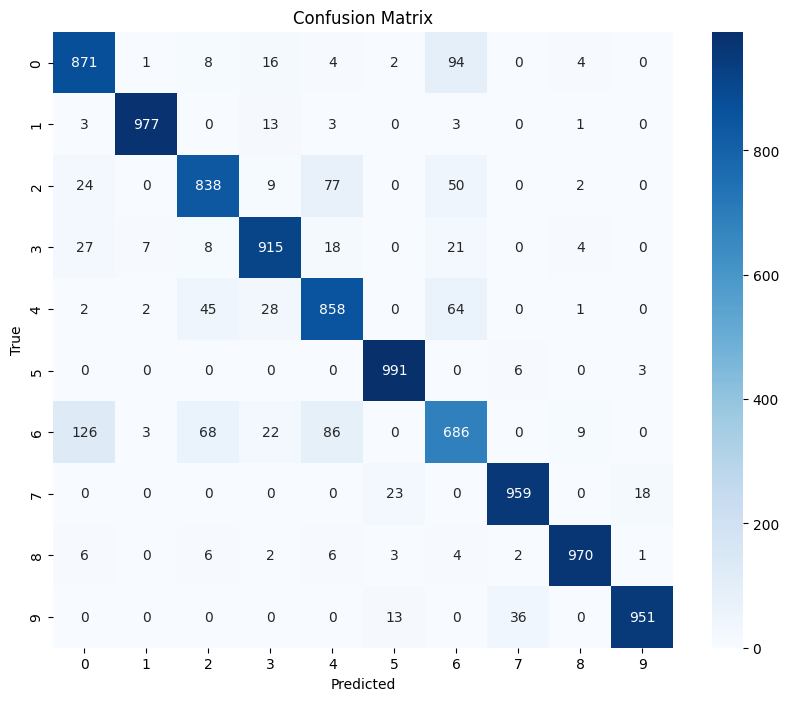

In [14]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred, labels=list(range(num_classes)))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=list(range(num_classes)), yticklabels=list(range(num_classes)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

It is maybe not surpirisng that shirt and t-shirt present a challenge. Let's look at a few predictions:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


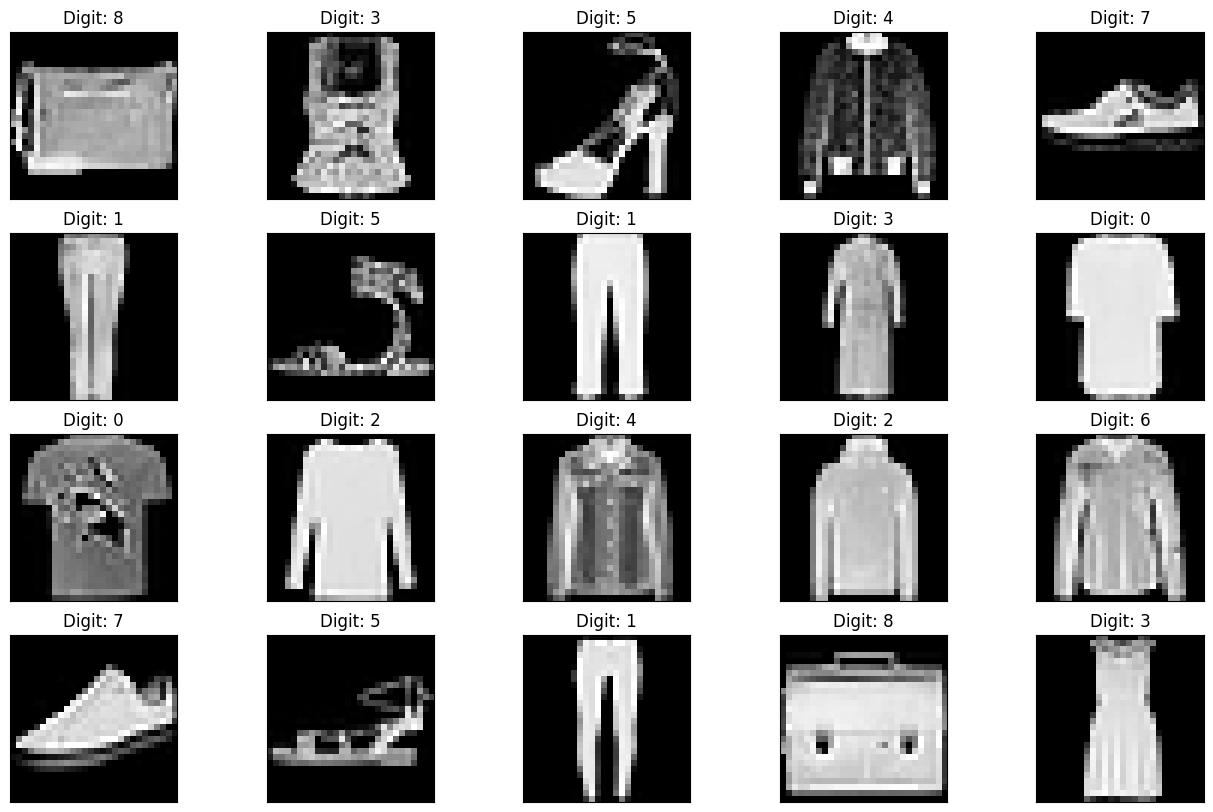

In [15]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])

random.seed(13)

plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(x_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)

plt.show()

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot